In [1115]:
import numpy as np
!pip3 install bt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1116]:
import bt
data = bt.get('QQQ, SCHD, BRK-B, SHV',
              start = '2013-01-01', end = '2023-12-31')

QQQ = bt.get('QQQ',
              start = '2013-01-01', end = '2023-12-31')
SPY = bt.get('SPY',
              start = '2013-01-01', end = '2023-12-31')


In [1117]:
!pip install quantstats


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1152]:
import pandas as pd
import yfinance as yf # 주가 데이터 받기위한 라이브러리
import quantstats as qs # 리포트 형식으로 시각화해주는 라이브러리
start = pd.to_datetime('2018-01-01')
end = pd.to_datetime('2023-12-01')
nn = 5
# yahoo finance에서 필요 종목들의 공통 시작일부터 종가 데이터 받기
def get_yahoo_data(tickers, type="Adj Close"):
  df = yf.download(tickers)
  # df = df["Close"]
  df = df[type]
  df.dropna(inplace=True)
  return df
  
def get_rebal_date(df, rebal="month", day=0):
    res_df = pd.DataFrame()
    df = df.loc[(start<=df.index) & (df.index<=end)]
    df["year"] = df.index.year
    df["month"] = df.index.month
    df["day"] = df.index.day
    if rebal == 'month':
        days_df = df.groupby(["year","month"]).first()
    elif rebal == 'year':
        days_df = df.groupby(["year"]).first()
    else:
        days_df = df.groupby(["year","month","day"]).first()
        # days_df = days_df.iloc[range(0, len(days_df), day)]
    # else:
    #     days_df = df.groupby(["year","month","day"]).max()
    print(days_df)
    return days_df
    # for i in range(len(days_df)):
    #     day = "{}-{}-{}".format(days_df.index[i][0], days_df.index[i][1], days_df.iloc[i])
    #     res_df = pd.concat([res_df,df[df.index==day]])
    # return res_df

tickers_canary = ["QQQ","BRK-B","SCHD", "SPY", "XLV", "TLT", "QLD", "TQQQ", "BIL", "SHV", "PSQ"]
tickers_g4 = ["QQQ","BRK-B","SCHD", "TLT"]
tickers_g12 = ["SPY", "QQQ", "IWM","VGK","EWJ", "EEM", "VNQ","DBC","GLD", "TLT", "HYG", "LQD"]
tickers_safe = ["SHV", "TLT"]
tickers_all = list(set(tickers_canary+tickers_g4+tickers_g12+tickers_safe))

data = get_yahoo_data(tickers_all) # 모든 데이터
rebal_data = get_rebal_date(data, 'day', day=1) # 월말 데이터
rebal_data.head(3)

[*********************100%%**********************]  20 of 20 completed
C:\Users\JBU\AppData\Local\Temp\ipykernel_27452\285024271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df.index.year
C:\Users\JBU\AppData\Local\Temp\ipykernel_27452\285024271.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df.index.month
C:\Users\JBU\AppData\Local\Temp\ipykernel_27452\285024271.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

Ticker                BIL       BRK-B        DBC        EEM        EWJ  \
year month day                                                           
2018 1     2    81.448303  197.220001  15.363913  41.927185  54.481239   
           3    81.466095  199.789993  15.455969  42.328907  55.231274   
           4    81.475044  200.690002  15.437557  42.538502  55.909004   
           5    81.475044  201.419998  15.382322  42.905281  56.062634   
           8    81.483925  202.740005  15.373120  42.905281  56.387951   
...                   ...         ...        ...        ...        ...   
2023 11    27   89.781342  361.339996  22.742430  38.649078  61.694408   
           28   89.800911  360.049988  23.018845  38.972950  61.684544   
           29   89.810699  358.690002  23.180883  38.747219  61.625378   
           30   89.849831  360.000000  22.790087  38.825737  61.743717   
     12    1    89.868507  357.070007  22.685238  38.992580  62.335411   

Ticker                 GLD        HYG

Ticker                BIL       BRK-B        DBC        EEM        EWJ  \
year month day                                                           
2018 1     2    81.448303  197.220001  15.363913  41.927185  54.481239   
           3    81.466095  199.789993  15.455969  42.328907  55.231274   
           4    81.475044  200.690002  15.437557  42.538502  55.909004   

Ticker                 GLD        HYG         IWM        LQD        PSQ  \
year month day                                                            
2018 1     2    125.150002  63.383869  141.990662  98.432945  31.714346   
           3    124.820000  63.688663  142.138245  98.612282  31.414902   
           4    125.459999  63.797539  142.516525  98.579674  31.360451   

Ticker                QLD         QQQ       SCHD        SHV         SPY  \
year month day                                                            
2018 1     2    18.784243  151.871964  41.717300  97.794731  242.319366   
           3    19.150669  153.347626  41.839211  97.794731  243.852097   
           4    19.219986  153.615967  42.042389  97.812508  244.879837   

Ticker                 TLT       TQQQ        VGK        VNQ        XLV  
year month day                                                          
2018 1     2    108.312912  11.821162  48.503365  65.155602  75.215088  
           3    108.830765  12.167272  48.674450  64.966446  75.934746  
           4    108.813492  12.238601  49.244686  63.847313  76.042732

C:\Users\JBU\AppData\Local\Temp\ipykernel_27452\3205726269.py:55: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  total = sum(((1+profit.iloc[i])*baa_g4.iloc[-1]).fillna(0))
C:\Users\JBU\AppData\Local\Temp\ipykernel_27452\3205726269.py:55: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  total = sum(((1+profit.iloc[i])*baa_g4.iloc[-1]).fillna(0))
C:\Users\JBU\AppData\Local\Temp\ipykernel_27452\3205726269.py:55: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects

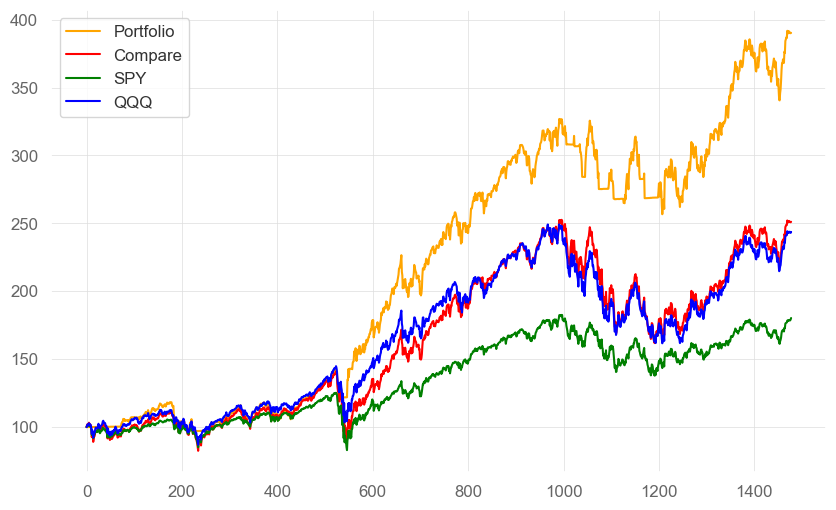

In [1169]:
# 공격형
attk_ticker = []
momentum_ticker = []
attk_ratio = []

scores = []
baa_g4 = pd.DataFrame(columns=tickers_all)
baa = pd.DataFrame(columns=tickers_all)
QQQ = pd.DataFrame(columns=tickers_all)
SPY = pd.DataFrame(columns=tickers_all)
compare = pd.DataFrame(columns=tickers_all)
res = [] # 총 자산 시작은 100

canary_data = rebal_data
profit = rebal_data.pct_change()
n=12
dates = []
flips = 0
flag = True #False = 하락장
patience = 0
for i in range(n, rebal_data.shape[0]):
    # print(canary_data.index[i], profit.index[i])
    m1 = (canary_data.iloc[i]-canary_data.iloc[(i-1*20)])/canary_data.iloc[(i-1*20)]
    m2 = (canary_data.iloc[i]-canary_data.iloc[(i-2*20)])/canary_data.iloc[(i-2*20)]
    m3 = (canary_data.iloc[i]-canary_data.iloc[i-3*20])/canary_data.iloc[i-3*20]
    m4 = (canary_data.iloc[i]-canary_data.iloc[i-4*20])/canary_data.iloc[i-4*20]
    m6 = (canary_data.iloc[i]-canary_data.iloc[i-6*20])/canary_data.iloc[i-6*20]
    m12 = (canary_data.iloc[i]-canary_data.iloc[i-12*20])/canary_data.iloc[i-12*20]
    score = m1 * 10
    score2 = m2 * 6
    score3 = m3 * 4
    score4 = m4 * 3
    score6 = m6 * 2
    score12 = m12 * 1
    
    scoreQQQ = score['QQQ'] + score3['QQQ'] + score6['QQQ'] + score12['QQQ']
    scoreSPY = score['SPY'] + score3['SPY'] + score6['SPY'] + score12['SPY']
    scoreXLV = score['XLV'] + score3['XLV'] + score6['XLV'] + score12['XLV']
    scoreTLT = score['TLT'] + score3['TLT'] + score6['TLT'] + score12['TLT']
    buy = dict()
    
    if scoreQQQ < scoreXLV < 0:
        buy['SHV'] = 100
    else:
        buy['QQQ'] = 30
        buy['QLD'] = 30
        buy['BRK-B'] = 30
        buy['XLV'] = 10
 
    if i == n:
        one = pd.DataFrame([list(buy.values())], columns=list(buy.keys()), index = [rebal_data.index[i]])
        baa_g4 = pd.concat([baa_g4, one])
        res.append(100)
    else:
        total = sum(((1+profit.iloc[i])*baa_g4.iloc[-1]).fillna(0))
        res.append(total)
        one = pd.DataFrame([list(buy.values())], columns=list(buy.keys()), index = [rebal_data.index[i]]) * total / 100
        baa_g4 = pd.concat([baa_g4, one])

baa["Total"] = res

baa_g4 = pd.DataFrame(columns=tickers_all)
res = [] # 총 자산 시작은 100

canary_data = rebal_data[tickers_canary]
profit = rebal_data.pct_change()
n=12
for i in range(n, rebal_data.shape[0]):
    buy = dict()
    buy['QQQ'] = 30
    buy['QLD'] = 30
    buy['BRK-B'] = 30
    buy['SCHD'] = 10
    if i == n:
        one = pd.DataFrame([list(buy.values())], columns=list(buy.keys()), index = [rebal_data.index[i]])
        baa_g4 = pd.concat([baa_g4, one])
        res.append(100)
    else:
        total = sum(((1+profit.iloc[i])*baa_g4.iloc[-1]).fillna(0))
        res.append(total)
        one = pd.DataFrame([list(buy.values())], columns=list(buy.keys()), index = [rebal_data.index[i]]) * total / 100
        baa_g4 = pd.concat([baa_g4, one])

compare["Total"] = res

baa_g4 = pd.DataFrame(columns=tickers_all)
res = [] # 총 자산 시작은 100

canary_data = rebal_data[tickers_canary]
profit = rebal_data.pct_change()
n=12
for i in range(n, rebal_data.shape[0]):
    buy = dict()
    buy['SPY'] = 100
    
    if i == n:
        one = pd.DataFrame([list(buy.values())], columns=list(buy.keys()), index = [rebal_data.index[i]])
        baa_g4 = pd.concat([baa_g4, one])
        res.append(100)
    else:
        total = sum(((1+profit.iloc[i])*baa_g4.iloc[-1]).fillna(0))
        res.append(total)
        one = pd.DataFrame([list(buy.values())], columns=list(buy.keys()), index = [rebal_data.index[i]]) * total / 100
        baa_g4 = pd.concat([baa_g4, one])

SPY["Total"] = res


baa_g4 = pd.DataFrame(columns=tickers_all)
res = [] # 총 자산 시작은 100

canary_data = rebal_data[tickers_canary]
profit = rebal_data.pct_change()
n=12
for i in range(n, rebal_data.shape[0]):
    buy = dict()
    buy['QQQ'] = 100
    
    if i == n:
        one = pd.DataFrame([list(buy.values())], columns=list(buy.keys()), index = [rebal_data.index[i]])
        baa_g4 = pd.concat([baa_g4, one])
        res.append(100)
    else:
        total = sum(((1+profit.iloc[i])*baa_g4.iloc[-1]).fillna(0))
        res.append(total)
        one = pd.DataFrame([list(buy.values())], columns=list(buy.keys()), index = [rebal_data.index[i]]) * total / 100
        baa_g4 = pd.concat([baa_g4, one])

QQQ["Total"] = res

plt.plot(baa["Total"], color='orange', label='Portfolio')
plt.plot(compare["Total"], color='red', label='Compare')
plt.plot(SPY["Total"], color='green', label='SPY')
plt.plot(QQQ["Total"], color='blue', label='QQQ')
plt.legend()
# qs.reports.html(baa["Total"], QQQ["Total"], SPY["Total"])

In [1167]:
print(flips)

0


In [1104]:
min(scores)

ValueError: min() arg is an empty sequence

In [ ]:
scores

In [ ]:
attack = ['QQQ', 'VWO', 'VEA', 'BND']
defense = ['TIP', 'DBC', 'BIL', 'IEF', 'TLT', 'LQD', 'BND']
canary = ['SPY', 'VWO', 'VEA', 'BND']

In [ ]:
def find_mom_by(detail:str, day:str, asset:list):
    
    def cal_momentum(day, ticker):
    
        day_datetime = datetime.strptime(day, '%Y-%m-%d')
        day_before = day_datetime - timedelta(days=400)
        
        ohlc = yf.download(ticker, start=datetime.strftime(day_before, '%Y- %m-%d') , end=datetime.strftime(day_datetime, '%Y-%m-%d' ), progress=False)
    
    def adj_price(day_before):
    
        param = day_before >= 1
        
        a = ohlc['Adj Close' ][-day_before] # 최근전 종가
        return a

    moment = 12*(adj_price(1)/adj_price(20)-1)+4*(adj_price(1)/adj_price(60)-1)+2*(adj_price(1)/adj_price(120)-1)+(adj_price(1)/adj_price(250)-1)
    return round(moment, 2)



In [125]:
def BAA(day:str, cash:float)->list:
    day = datetime.strftime(datetime.strptime(day, '%Y-%m-%d') + timedelta(days=1), '%Y-%m-%d' )
    def BAA_logic(day:str)->str:
        canary = ['SPY', 'VWO', 'VEA', 'BND']
        try:
            if (find_mom_by('abs', day, canary) >0). value_counts()[False] > 0:
                BAA = 'DEF'
            else:
                pass

        except:
            BAA = 'ATT'

        return BAA

    attack = ['QQQ', 'VWO', 'VEA', 'BND']
    defense = ['TIP', 'DBC', 'BIL', 'IEF', 'TLT', 'LQD', 'BND']
    
    stock_C = {} # 매수종목 초기화
    remain_cash = cash
    if BAA_logic(day) == 'DEF':
        BIL = find_mom_by('rel', day, ['BIL']) [0]
        ticker_buy = find_mom_by('rel', day, defense)
        df = ticker_buy.to_frame()
        
        df = df[df['Value'] > BIL]
        amount_buy = len(df.index)
        
        if amount_buy > 3:
            for i in range(0, 3):
                price_i = yf.download(df.index[i], start=day, end=day, progress=False)['Adj Close'][0]
                num_i = int(0.33 * cash / price_i)
                
                stock_C[df.index[i]] = num_i
                remain_cash = remain_cash - num_i * price_i * (1+0.0025)
        else:
            for i in range(0, amount_buy):
                price_i = yf.download(df.index[i], start=day, end=day, progress=False)['Adj Close'][0]
                num_i = int(0.33 * cash / price_i)
                
                stock_C[df.index[i]] = num_i
                remain_cash = remain_cash - num_i * price_i * (1+0.0025)

    elif BAA_logic(day) == 'ATT':
        stock = find_mom_by('rel', day, attack).index[0]
        price_i = yf.download(stock, start=day, end=day, progress=False)['Adj Close'][0]
        num_i = int(cash / price_i)
        remain_cash = remain_cash - num_i * price_i * (1+0.0025)
    else:
        print('error')
    return [round(remain_cash, 2), str(stock_C)]

In [57]:
def backtest(df_init, init_cash:float, add_money:float, rebalance_day:int):

    list_day = []
    list_cash = []
    list_close_s = []
    list_exp = []
    num = 0 #거래 횟수 초기화
    
    for i in range(0, len(df_init.index)):
        day = df_init.index[i]
    
    if (i != 0) and ((i+1) % rebalance_day != 0):
        open_s = close_s
        cash = remain_cash
        
        close_s = open_s
        remain_cash = cash
        exp = cal_exp(day, remain_cash, close_s, 'Adj Close')
    
    elif (i+1) % rebalance_day == 0: #일(영업일) 단위 추가금 및 리밸런싱
        open_s = close_s
        cash = remain_cash
        
        cash = sell_everything(day, cash, open_s)[0] # 보유 모두 매도
        cash = cash + add_money # 월 추가금액
        remain_cash = BAA(day, cash)[0]
        close_s = BAA(day, cash) [1]
        exp = cal_exp(day, remain_cash, close_s, 'Adj Close')
        num += 1

    elif i == 0: #1일차
        cash = init_cash
        open_s = '{}'

        remain_cash = BAA(day, cash)[0]
        close_s = BAA(day, cash)[1]
        exp = cal_exp(day, remain_cash, close_s, 'Adj Close')

    else:
        print('Backtest Error')
    #list_day.append(df_init.index[i])
    list_cash.append(cash)
    list_close_s.append(close_s)
    list_exp.append(exp)

    df_init['Cash'] = list_cash
    df_init['Close_S'] = list_close_s
    df_init['Exp'] = list_exp

    return df_init, num

In [59]:
backtest(SPY, 1000, 260, 30)

UnboundLocalError: cannot access local variable 'close_s' where it is not associated with a value

In [28]:
data

,qqq,schd,brkb,shv
Date,,,,
2011-10-20,50.395138,17.026478,75.870003,97.126984
2011-10-21,51.027412,17.360456,77.449997,97.144600
2011-10-24,52.087135,17.455883,77.239998,97.126984
2011-10-25,51.063034,17.169613,75.739998,97.126984
2011-10-26,51.000702,17.346830,78.019997,97.126984
...,...,...,...,...
2023-12-22,407.626312,75.263878,356.470001,109.095413
2023-12-26,410.121704,75.631027,356.829987,109.115250
2023-12-27,410.956604,75.690559,356.950012,109.115250


In [47]:
backtest=bt.Backtest(strategy, data)

In [48]:

result = bt.run(backtest)

C:\Users\JBU\PycharmProjects\pythonProject1\venv\Lib\site-packages\ffn\core.py:191: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.monthly_prices = obj.resample("M").last()  # .dropna()
C:\Users\JBU\PycharmProjects\pythonProject1\venv\Lib\site-packages\ffn\core.py:193: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.yearly_prices = obj.resample("A").last()  # .dropna()
C:\Users\JBU\PycharmProjects\pythonProject1\venv\Lib\site-packages\ffn\core.py:191: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.monthly_prices = obj.resample("M").last()  # .dropna()
C:\Users\JBU\PycharmProjects\pythonProject1\venv\Lib\site-packages\ffn\core.py:193: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.yearly_prices = obj.resample("A").last()  # .dropna()


In [50]:
result.display()

Stat                 LIFE
-------------------  ----------
Start                2011-10-19
End                  2023-12-29
Risk-free rate       0.00%

Total Return         291.64%
Daily Sharpe         0.97
Daily Sortino        1.53
CAGR                 11.85%
Max Drawdown         -22.74%
Calmar Ratio         0.52

MTD                  2.85%
3m                   6.60%
6m                   7.45%
YTD                  19.04%
1Y                   18.91%
3Y (ann.)            9.97%
5Y (ann.)            13.00%
10Y (ann.)           10.79%
Since Incep. (ann.)  11.85%

Daily Sharpe         0.97
Daily Sortino        1.53
Daily Mean (ann.)    11.98%
Daily Vol (ann.)     12.38%
Daily Skew           -0.40
Daily Kurt           11.44
Best Day             6.80%
Worst Day            -7.60%

Monthly Sharpe       1.11
Monthly Sortino      2.06
Monthly Mean (ann.)  11.68%
Monthly Vol (ann.)   10.53%
Monthly Skew         -0.39
Monthly Kurt         0.57
Best Month           9.42%
Worst Month          -7.65%

Y

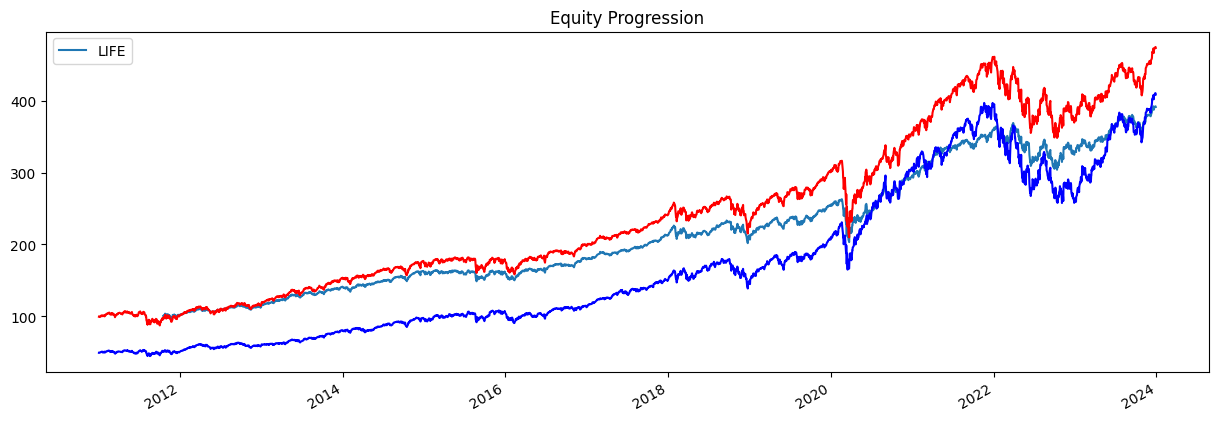

In [51]:
from matplotlib import pyplot as plt
result.plot()
plt.plot(SPY, color='red')
plt.plot(QQQ, color='blue')
plt.legend()